

---

<center><h1>Assignment 4</h1></center>

---

# 1. <font color='#556b2f'> **Support Vector Machines with Synthetic Data**</font>, 50 points. 

For this problem, we will generate synthetic data for a nonlinear binary classification problem and partition it into training, validation and test sets. Our goal is to understand the behavior of SVMs with Radial-Basis Function (RBF) kernels with different values of $C$ and $\gamma$.

In [30]:
#
# DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH DATA GENERATION, 
# MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
import matplotlib.pyplot as plt          
%matplotlib inline

def generate_data(n_samples, tst_frac=0.2, val_frac=0.2):
  # Generate a non-linear data set
  X, y = make_moons(n_samples=n_samples, noise=0.25, random_state=42)
   
  # Take a small subset of the data and make it VERY noisy; that is, generate outliers
  m = 30
  np.random.seed(30)  # Deliberately use a different seed
  ind = np.random.permutation(n_samples)[:m]
  X[ind, :] += np.random.multivariate_normal([0, 0], np.eye(2), (m, ))
  y[ind] = 1 - y[ind]

  # Plot this data
  cmap = ListedColormap(['#b30065', '#178000'])  
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
  
  # First, we use train_test_split to partition (X, y) into training and test sets
  X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac, 
                                                random_state=42)

  # Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
  X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, 
                                                random_state=42)
  
  return (X_trn, y_trn), (X_val, y_val), (X_tst, y_tst)

In [2]:
#
#  DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH VISUALIZATION, 
#  MAKE A COPY OF THIS FUNCTION AND THEN EDIT 
#

def visualize(models, param, X, y):
  # Initialize plotting
  if len(models) % 3 == 0:
    nrows = len(models) // 3
  else:
    nrows = len(models) // 3 + 1
    
  fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5.0 * nrows))
  cmap = ListedColormap(['#b30065', '#178000'])

  # Create a mesh
  xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
  yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
  xMesh, yMesh = np.meshgrid(np.arange(xMin, xMax, 0.01), 
                             np.arange(yMin, yMax, 0.01))

  for i, (p, clf) in enumerate(models.items()):
    # if i > 0:
    #   break
    r, c = np.divmod(i, 3)
    ax = axes[r, c]

    # Plot contours
    zMesh = clf.decision_function(np.c_[xMesh.ravel(), yMesh.ravel()])
    zMesh = zMesh.reshape(xMesh.shape)
    ax.contourf(xMesh, yMesh, zMesh, cmap=plt.cm.PiYG, alpha=0.6)

    if (param == 'C' and p > 0.0) or (param == 'gamma'):
      ax.contour(xMesh, yMesh, zMesh, colors='k', levels=[-1, 0, 1], 
                 alpha=0.5, linestyles=['--', '-', '--'])

    # Plot data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
    ax.set_title('{0} = {1}'.format(param, p))

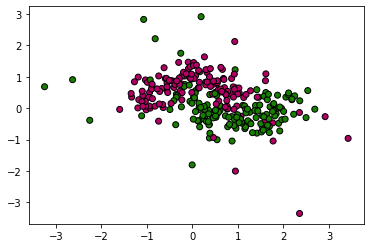

In [3]:
# Generate the data
n_samples = 300    # Total size of data set 
(X_trn, y_trn), (X_val, y_val), (X_tst, y_tst) = generate_data(n_samples)

---
### **a**. (25 points)  The effect of the regularization parameter, $C$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $\gamma$ and various choices of $C \in \{10^{-3}, 10^{-2}\, \cdots, 1, \, \cdots\, 10^5\}$. The value of $\gamma$ is fixed to $\gamma = \frac{1}{d \cdot \sigma_X}$, where $d$ is the data dimension and $\sigma_X$ is the standard deviation of the data set $X$. SVC can automatically use these setting for $\gamma$ if you pass the argument gamma = 'scale' (see documentation for more details).

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $C$? Based on the visualization of the models and their resulting classifiers, how does changing $C$ change the models? Explain in terms of minimizing the SVM's objective function $\frac{1}{2} \mathbf{w}^\prime \mathbf{w} \, + \, C \, \Sigma_{i=1}^n \, \ell(\mathbf{w} \mid \mathbf{x}_i, y_i)$, where $\ell$ is the hinge loss for each training example $(\mathbf{x}_i, y_i)$.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $C_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$_.

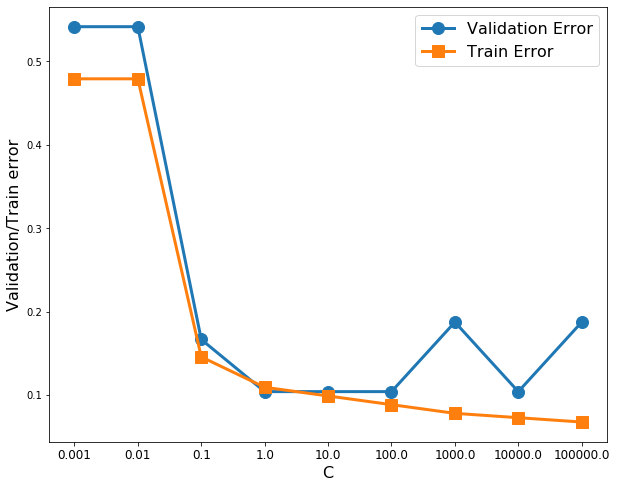

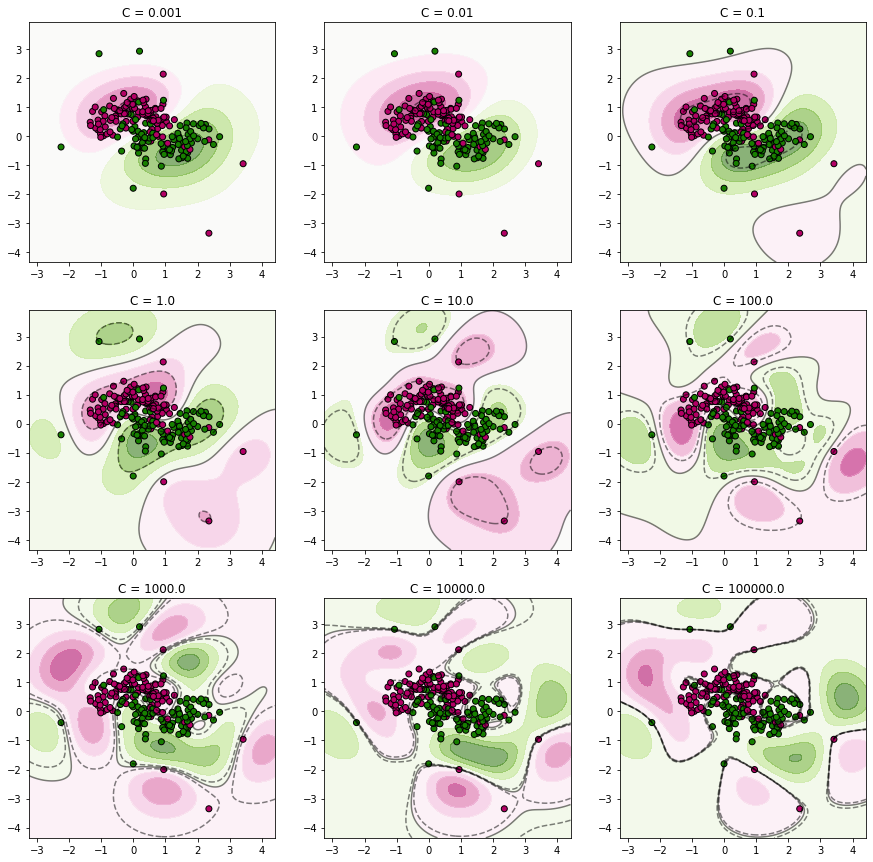

In [4]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed gamma = 1 / (n_features * X.std()) and different values of C
C_range = np.arange(-3.0, 6.0, 1.0)
C_values = np.power(10.0, C_range)

models = dict()
trnErr = dict()
valErr = dict()

for idx,C in enumerate(C_values):
    clf = SVC(C = C,gamma='scale',kernel='rbf')
    clf.fit(X_trn, y_trn)
    models[C]=clf
    y_trnpred = clf.predict(X_trn)
    y_valpred = clf.predict(X_val)
    trnErr[idx] =np.sum(np.power(np.subtract(y_trn,y_trnpred),2))/len(y_trn)
    valErr[idx] =np.sum(np.power(np.subtract(y_val,y_valpred),2))/len(y_val)

plt.figure(figsize=(10,8))
plt.plot(list(valErr.keys()), list(valErr.values()), marker='o', linewidth=3, markersize=12)
plt.plot(list(trnErr.keys()), list(trnErr.values()), marker='s', linewidth=3, markersize=12)
plt.xlabel('C', fontsize=16)
plt.ylabel('Validation/Train error', fontsize=16)
plt.xticks(list(trnErr.keys()), ('0.001', '0.01', '0.1', '1.0', '10.0','100.0','1000.0','10000.0','100000.0'),fontsize=12)
plt.legend(['Validation Error', 'Train Error'], fontsize=16)
 
visualize(models, 'C', X_trn, y_trn)


## Observation:
Increasing the value of C generates boundaries that closely fit the data points of the two classes. 
And accordingly, the classification error decreases in both training and validation test.


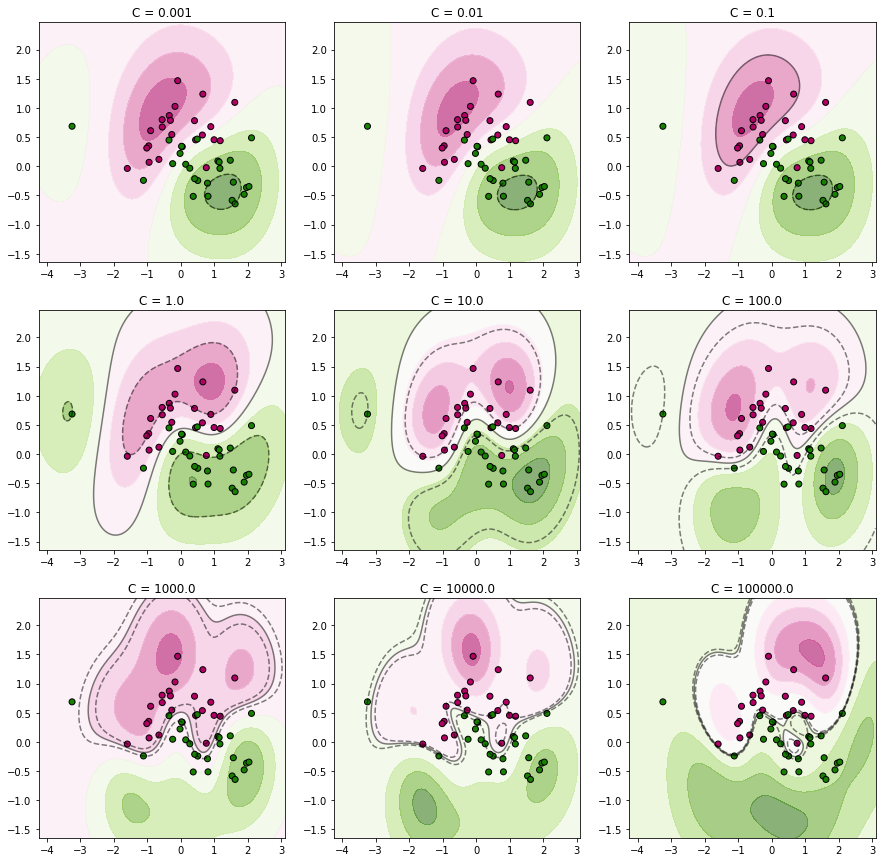

In [5]:
models_val = dict()
for idx,C in enumerate(C_values):
    clf = SVC(C = C,gamma='scale',kernel='rbf')
    clf.fit(X_val, y_val)
    models_val[C]=clf

visualize(models_val, 'C', X_val, y_val)

Validation error is the minimum for the case C=100000.0
Choosing that model to find the Test set error

In [6]:
clf = SVC(C = 100000,gamma='scale',kernel='rbf')
clf.fit(X_trn, y_trn)
y_tstpred = clf.predict(X_tst)
tstErr =np.sum(np.power(np.subtract(y_tst,y_tstpred),2))/len(y_trn)
print('Test Error was evaluated to be : '+ str(tstErr))


Test Error was evaluated to be : 0.08854166666666667


### Accuracy on Test Dataset = 0.08854

---
### **b**. (25 points)  The effect of the RBF kernel parameter, $\gamma$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns various non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $C$ and various choices of $\gamma \in \{10^{-2}, 10^{-1}\, 1, 10, \, 10^2 \, 10^3\}$. The value of $C$ is fixed to $C = 10$.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $\gamma$? Based on the visualization of the models and their resulting classifiers, how does changing $\gamma$ change the models? Explain in terms of the functional form of the RBF kernel, $\kappa(\mathbf{x}, \,\mathbf{z}) \, = \, \exp(-\gamma \cdot \|\mathbf{x} - \mathbf{z} \|^2)$

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $\gamma_{best}$_.

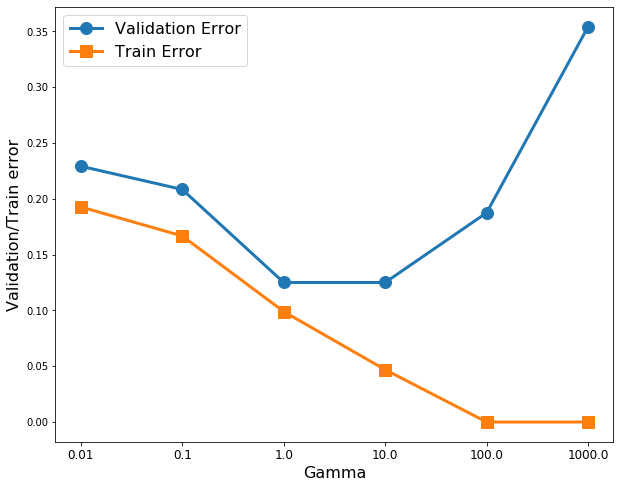

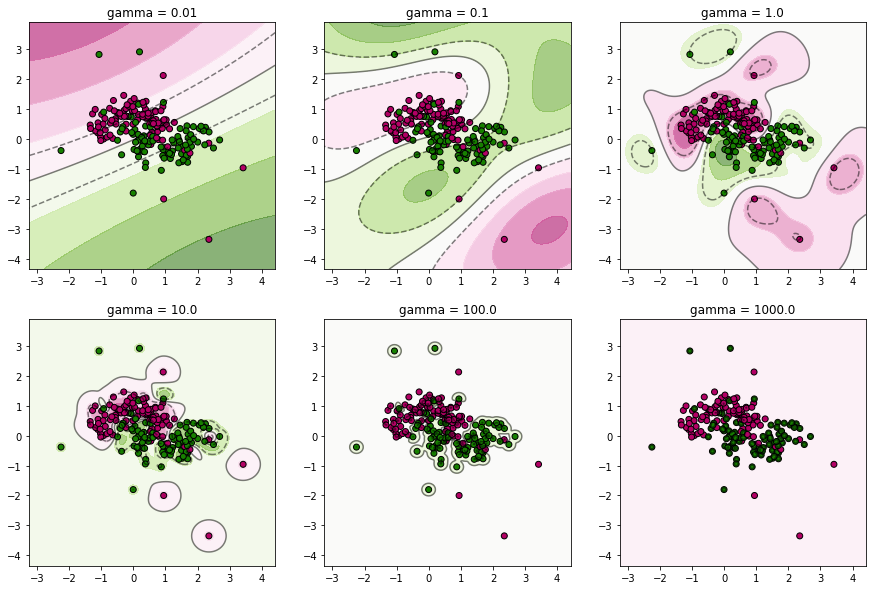

In [7]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed C = 10.0 and different values of gamma
gamma_range = np.arange(-2.0, 4.0, 1.0)
gamma_values = np.power(10.0, gamma_range)

models = dict()
trnErr = dict()
valErr = dict()

for idx,G in enumerate(gamma_values):
    clf = SVC(C = 10,gamma=G,kernel='rbf')
    clf.fit(X_trn, y_trn)
    models[G]=clf
    y_trnpred = clf.predict(X_trn)
    y_valpred = clf.predict(X_val)
    trnErr[idx] =np.sum(np.power(np.subtract(y_trn,y_trnpred),2))/len(y_trn)
    valErr[idx] =np.sum(np.power(np.subtract(y_val,y_valpred),2))/len(y_val)

plt.figure(figsize=(10,8))
plt.plot(list(valErr.keys()), list(valErr.values()), marker='o', linewidth=3, markersize=12)
plt.plot(list(trnErr.keys()), list(trnErr.values()), marker='s', linewidth=3, markersize=12)
plt.xlabel('Gamma', fontsize=16)
plt.ylabel('Validation/Train error', fontsize=16)
plt.xticks(list(trnErr.keys()), ( '0.01', '0.1', '1.0', '10.0','100.0','1000.0'),fontsize=12)
plt.legend(['Validation Error', 'Train Error'], fontsize=16)

  
visualize(models, 'gamma', X_trn, y_trn)

## Observation:
Increasing the value of Gamma 
The classification error decreases in training set with increasing gamma ??
Whereas in Validation set, the error increases for hifher values of gamma ??


In [8]:
valErr

{0: 0.22916666666666666,
 1: 0.20833333333333334,
 2: 0.125,
 3: 0.125,
 4: 0.1875,
 5: 0.3541666666666667}

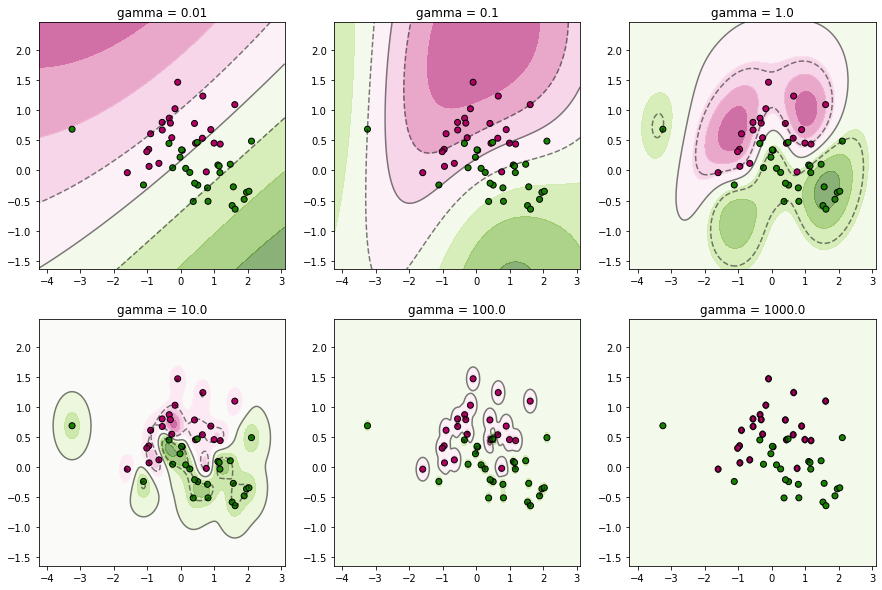

In [9]:
models_val = dict()
for idx,G in enumerate(gamma_values):
    clf = SVC(C = 10,gamma=G,kernel='rbf')
    clf.fit(X_val, y_val)
    models_val[G]=clf

visualize(models_val,'gamma', X_val, y_val)

Validation error is the minimum for the case Gamma = 1
Choosing that model to find the Test set error

In [10]:
clf = SVC(C = 10,gamma=1.0,kernel='rbf')
clf.fit(X_trn, y_trn)
y_tstpred = clf.predict(X_tst)
tstErr =np.sum(np.power(np.subtract(y_tst,y_tstpred),2))/len(y_trn)
print('Test Error was evaluated to be : '+ str(tstErr))


Test Error was evaluated to be : 0.052083333333333336


### Accuracy on Test Dataset = 0.0520

---
# 2. <font color='#556b2f'> **Breast Cancer Diagnosis with Support Vector Machines**</font>, 25 points. 

For this problem, we will use the [Wisconsin Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) data set, which has already been pre-processed and partitioned into training, validation and test sets. Numpy's [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) command can be used to load CSV files.

In [11]:
# Load the Breast Cancer Diagnosis data set; download the files from eLearning
# CSV files can be read easily using np.loadtxt()
#
# Insert your code here.
cancer_trn=np.loadtxt(open("wdbc_trn.csv", "rb"), delimiter=",")
Xtrn=cancer_trn[:,1:]
ytrn=cancer_trn[:,0]
cancer_tst=np.loadtxt(open("wdbc_tst.csv", "rb"), delimiter=",")
Xtst=cancer_tst[:,1:]
ytst=cancer_tst[:,0]
cancer_val=np.loadtxt(open("wdbc_val.csv", "rb"), delimiter=",")
Xval=cancer_val[:,1:]
yval=cancer_val[:,0]


Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for **each combination** of $C \in \{10^{-2}, 10^{-1}, 1, 10^1, \, \cdots\, 10^4\}$ and $\gamma \in \{10^{-3}, 10^{-2}\, 10^{-1}, 1, \, 10, \, 10^2\}$. Print the tables corresponding to the training and validation errors.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter values, $C_{best}$ and $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$ and $\gamma_{best}$_.

In [27]:
Crange = np.arange(-2.0, 4.0, 1.0)
Cvalues = np.power(10.0, Crange)

grange = np.arange(-3.0, 2.0, 1.0)
gvalues = np.power(10.0, grange)

valErr=dict()

counter1=0
counter2=0

print('Training Error')
print('\n')       
print('\n')

for i in  Cvalues:
    for j in gvalues:
        clf = SVC(C = i,gamma=j,kernel='rbf')
        clf.fit(Xtrn, ytrn)
        y_trnpred=clf.predict(Xtrn)
        trnErr=np.sum(np.power(np.subtract(ytrn,y_trnpred),2))/len(ytrn)
        print(str(round(trnErr, 3)),sep=' ',end="\t")
        counter1 += 1
        if counter1%len(gvalues) == 0:
            print()
        else:
            counter1
print('\n')       
print('\n')
print('Validation Error')
for i in  Cvalues:
    for j in gvalues:
        clf = SVC(C = i,gamma=j,kernel='rbf')
        clf.fit(Xtrn, ytrn)
        y_valpred = clf.predict(Xval)
        valErr =np.sum(np.power(np.subtract(yval,y_valpred),2))/len(yval)
        print(str(round(valErr, 3)),sep=' ',end="\t")
        counter2 += 1
        if counter2%len(gvalues) == 0:
            print()
        else:
            counter2


Training Error




1.487	1.487	1.487	1.487	1.487	
1.227	0.201	0.142	1.487	1.487	
0.189	0.118	0.047	0.0	0.0	
0.106	0.047	0.0	0.0	0.0	
0.059	0.012	0.0	0.0	0.0	
0.024	0.0	0.0	0.0	0.0	




Validation Error
1.496	1.496	1.496	1.496	1.496	
1.217	0.278	0.313	1.496	1.496	
0.243	0.243	0.174	1.496	1.496	
0.139	0.174	0.139	1.496	1.496	
0.139	0.104	0.139	1.496	1.496	
0.139	0.104	0.139	1.496	1.496	


## C_best=   Gamma_best=

In [ ]:
clf = SVC(C = c_best,gamma=gamma_best,kernel='rbf')
clf.fit(Xtrn, ytrn)
y_tstpred = clf.predict(Xtst)
tstErr =np.sum(np.power(np.subtract(y_tst,y_tstpred),2))/len(y_trn)
print('Test Error was evaluated to be : '+ str(tstErr))


### Accuracy on Test Dataset = 

---
# 3. <font color='#556b2f'> **Breast Cancer Diagnosis with $k$-Nearest Neighbors**</font>, 25 points. 

Use scikit-learn's [k-nearest neighbor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) classifier to learn models for Breast Cancer Diagnosis with $k \in \{1, \, 5, \, 11, \, 15, \, 21\}$, with the kd-tree algorithm.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter value, $k_{best}$. Report the accuracy on the **test set** for this selected best kNN model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $k_{best}$_.

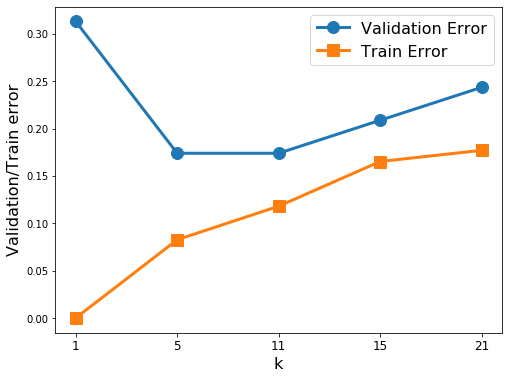

In [40]:
k=[1,5,11,15,21]
trnError=dict()
valError=dict()
for idx,val in enumerate(k):
    neigh = KNeighborsClassifier(n_neighbors=val)
    neigh.fit(Xtrn,ytrn) 
    ytrn_pred=neigh.predict(Xtrn)
    yval_pred=neigh.predict(Xval)
    trnError[idx]=np.sum(np.power(np.subtract(ytrn,ytrn_pred),2))/len(ytrn)
    valError[idx]=np.sum(np.power(np.subtract(yval,yval_pred),2))/len(yval)
    
plt.figure(figsize=(8,6))
plt.plot(list(valError.keys()), list(valError.values()), marker='o', linewidth=3, markersize=12)
plt.plot(list(trnError.keys()), list(trnError.values()), marker='s', linewidth=3, markersize=12)
plt.xlabel('k', fontsize=16)
plt.ylabel('Validation/Train error', fontsize=16)
plt.xticks(list(trnError.keys()), ( '1', '5', '11', '15','21'),fontsize=12)
plt.legend(['Validation Error', 'Train Error'], fontsize=16)
    

### Best value of k is 5

In [42]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(Xtrn,ytrn) 
ytst_pred=neigh.predict(Xtst)
tstError=np.sum(np.power(np.subtract(ytst,ytst_pred),2))/len(ytst)
print(tstError)

0.17391304347826086


**Discussion**: Which of these two approaches, SVMs or kNN, would you prefer for this classification task? Explain.

Comapre the values of best test error in both cases and decide ??